# Check validation results returned by OpenAI

When you pass a validation file to your fine-tuning job, openAI also returns validation metrics while getting the results. 

This notebook assumes the results are in the files listed below, and visualizes the validation loss, sequence accuracy (accuracy on predicting the whole sequence correctly) and token accuracy (accuracy on predicting individual tokens correctly).

In [7]:
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
csv_files = [
    "ft-i5m6oTIIEbwlSDB0cEn7Q3UW.csv", 
    "ft-kKAdWXe2sKPsa9kqgfZW2P5e.csv",
    "ft-lKhu84vhQp2q97BBcbIobyLI.csv",
    "ft-vQjqVAUgAg5pAHZgxMI79yb2.csv"
]


results = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
results.tail(10)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
5429,1079,23134688,34528,0.013386,0.12500,0.897521,NaN,NaN,NaN
5430,1080,23156224,34560,0.025441,0.09375,0.848014,NaN,NaN,NaN
5431,1081,23165984,34592,0.043153,0.06250,0.884615,0.049831,0.0,0.768202
5432,1082,23184704,34624,0.027617,0.03125,0.884384,NaN,NaN,NaN
5433,1083,23204448,34656,0.022368,0.00000,0.881029,NaN,NaN,NaN
5434,1084,23221888,34688,0.019127,0.03125,0.922865,NaN,NaN,NaN
5435,1085,23245984,34720,0.019150,0.03125,0.878561,NaN,NaN,NaN
5436,1086,23259584,34752,0.036711,0.03125,0.884967,NaN,NaN,NaN
5437,1087,23287264,34784,0.016367,0.12500,0.895935,NaN,NaN,NaN
5438,1088,23321856,34816,0.013212,0.12500,0.923490,NaN,NaN,NaN


In [9]:
validation_only = results[["validation_loss", "validation_sequence_accuracy", "validation_token_accuracy"]]
validation_only.dropna(inplace=True)
validation_only.head(10)

/var/folders/db/mt9kjk117tv8xgp07qzfv4wh0000gn/T/ipykernel_5997/1645318576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_only.dropna(inplace=True)


,validation_loss,validation_sequence_accuracy,validation_token_accuracy
0,0.187537,0.0,0.412023
8,0.047805,0.0,0.500705
16,0.112102,0.0,0.446552
24,0.115390,0.0,0.419689
32,0.278159,0.0,0.405777
40,0.056963,0.0,0.501792
48,0.197224,0.0,0.457143
56,0.223383,0.0,0.459547
64,0.079497,0.0,0.463259
72,0.103614,0.0,0.451724


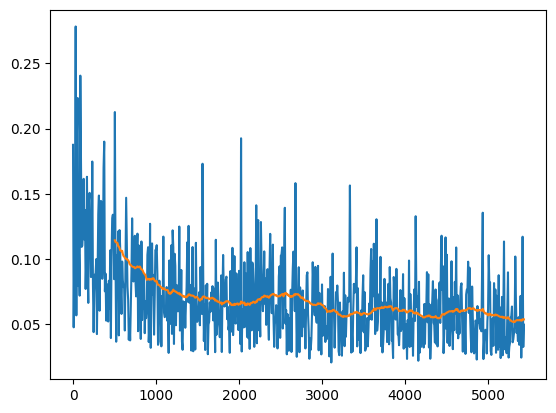

In [10]:
plt.plot(validation_only["validation_loss"])
plt.plot(validation_only["validation_loss"].rolling(window=64).mean())

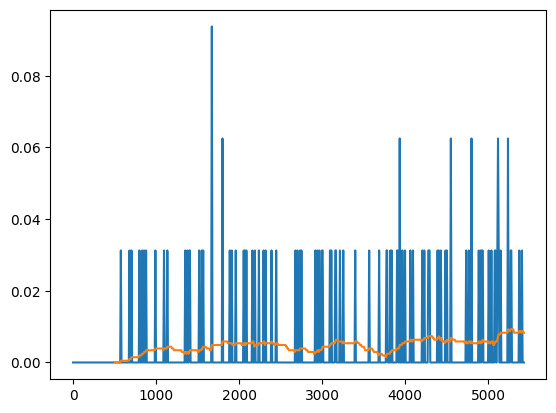

In [11]:
plt.plot(validation_only["validation_sequence_accuracy"])
plt.plot(validation_only["validation_sequence_accuracy"].rolling(window=64).mean())

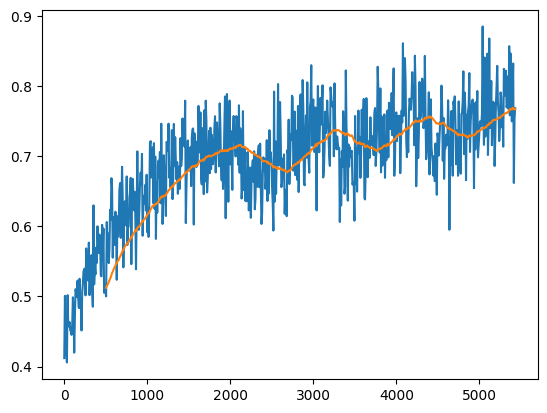

In [12]:
plt.plot(validation_only["validation_token_accuracy"])
plt.plot(validation_only["validation_token_accuracy"].rolling(window=64).mean())